# Shapely Values

Shapely values are a method to explain the prediction of a machine learning model. They are based on the Shapely value concept from cooperative game theory. The idea is to assign a value to each feature of the model, which represents the contribution of the feature to the prediction. The Shapely value is the unique solution to a set of axioms that are considered reasonable for feature importance. The Shapely value is the only method that satisfies all these axioms.


In [13]:
import pandas as pd
import shap
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split

## Linear Regression


In [14]:
df = pd.read_csv("./datasets/dataset_colesterol.csv")

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Id                  1000 non-null   int64  
 1   Grupo Sanguíneo     1000 non-null   object 
 2   Fumante             1000 non-null   object 
 3   Nível de Atividade  1000 non-null   object 
 4   Idade               1000 non-null   int64  
 5   Peso                1000 non-null   float64
 6   Altura              1000 non-null   int64  
 7   Colesterol          1000 non-null   float64
dtypes: float64(2), int64(3), object(3)
memory usage: 62.6+ KB


In [16]:
df.drop("Id", axis=1, inplace=True)
df = pd.get_dummies(df, columns=["Grupo Sanguíneo", "Fumante", "Nível de Atividade"])

In [17]:
df.head()

,Idade,Peso,Altura,Colesterol,Grupo Sanguíneo_A,Grupo Sanguíneo_AB,Grupo Sanguíneo_B,Grupo Sanguíneo_O,Fumante_Não,Fumante_Sim,Nível de Atividade_Alto,Nível de Atividade_Baixo,Nível de Atividade_Moderado
0,33,85.1,186,199.63,0,0,1,0,0,1,0,1,0
1,68,105.0,184,236.98,1,0,0,0,1,0,0,0,1
2,25,64.8,180,161.79,0,0,0,1,1,0,1,0,0
3,43,120.2,167,336.24,1,0,0,0,1,0,1,0,0
4,79,88.5,175,226.23,0,1,0,0,1,0,0,1,0


In [18]:
X = df.drop("Colesterol", axis=1)
y = df["Colesterol"]

In [19]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=51
)

In [20]:
reg_model = LinearRegression()
reg_model.fit(X_train, y_train)

LinearRegression()

### Plot Shapley Values


In [21]:
# Run the explainer
reg_explainer = shap.Explainer(reg_model.predict, X_train)

In [22]:
# Calculate SHAP values
reg_shap_values = reg_explainer(X_test)

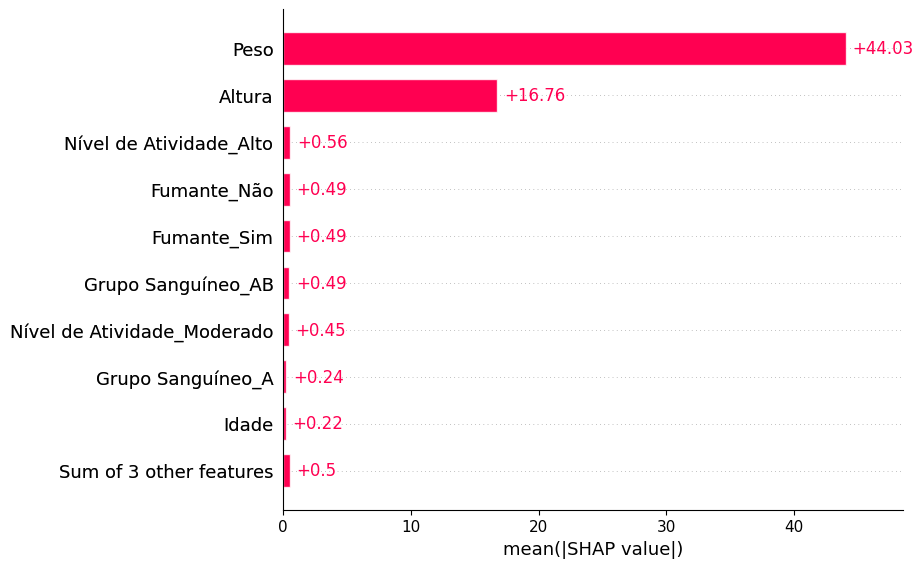

In [23]:
shap.plots.bar(reg_shap_values)

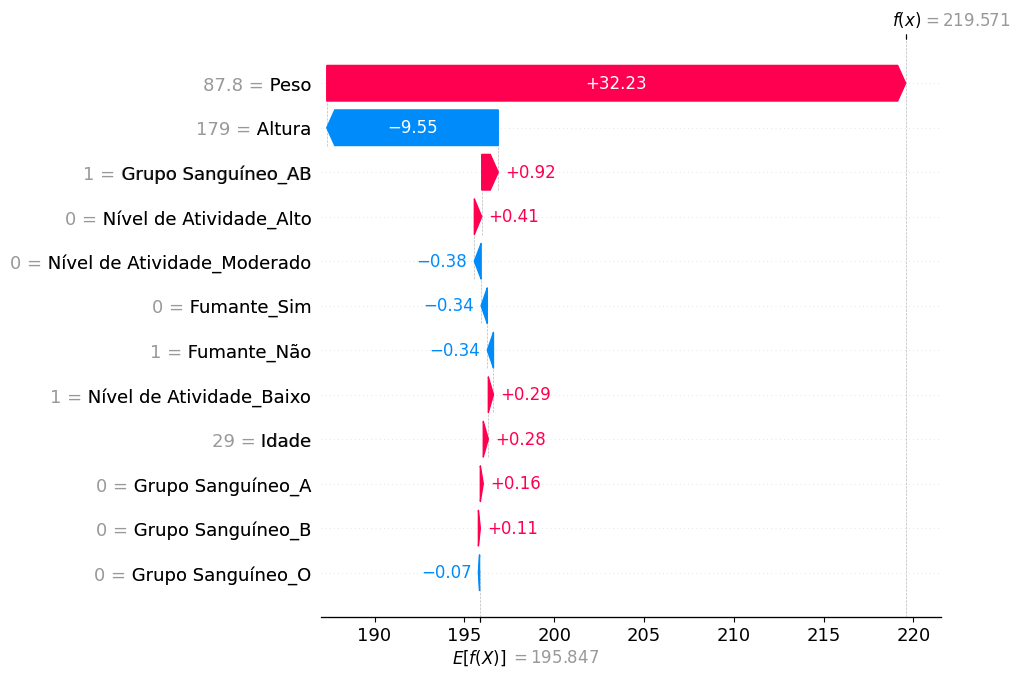

In [25]:
# Plot SHAP values for the first instance
shap.plots.waterfall(reg_shap_values[0], max_display=14)

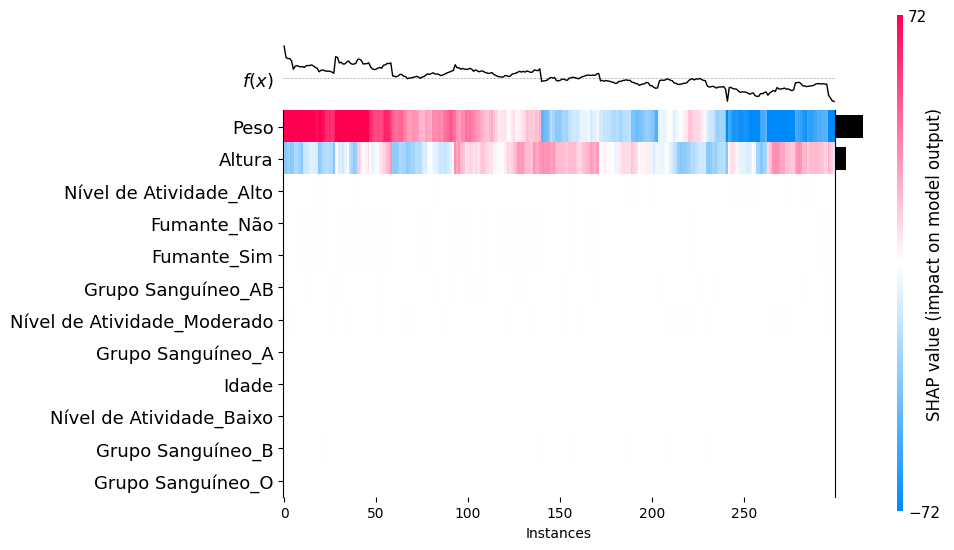

<Axes: xlabel='Instances'>

In [26]:
shap.plots.heatmap(reg_shap_values, max_display=14)

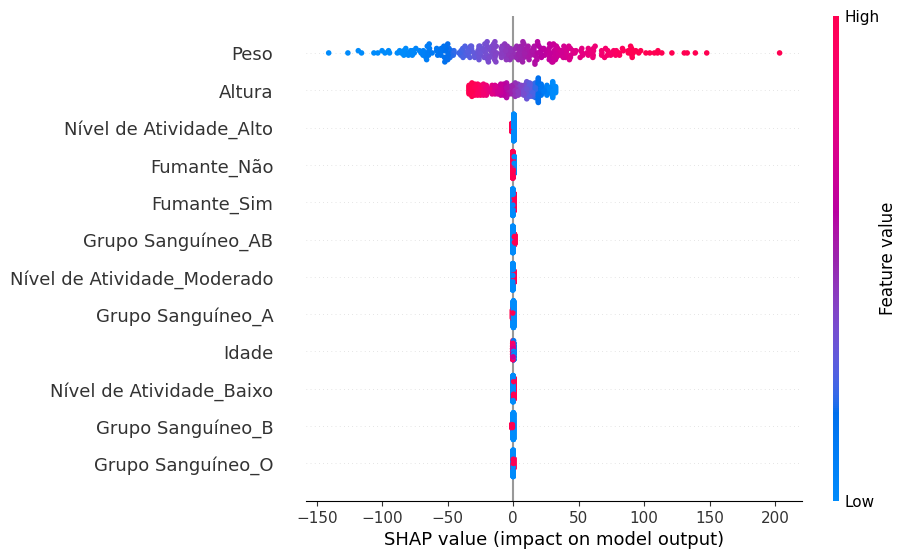

In [28]:
shap.plots.beeswarm(reg_shap_values, max_display=14)

## Logistic Regression


In [29]:
df = pd.read_csv("./datasets/fruit_quality.csv")

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         4000 non-null   int64  
 1   Size         4000 non-null   float64
 2   Weight       4000 non-null   float64
 3   Sweetness    4000 non-null   float64
 4   Crunchiness  4000 non-null   float64
 5   Juiciness    4000 non-null   float64
 6   Ripeness     4000 non-null   float64
 7   Acidity      4000 non-null   float64
 8   Quality      4000 non-null   object 
dtypes: float64(7), int64(1), object(1)
memory usage: 281.4+ KB


In [31]:
df.drop("A_id", axis=1, inplace=True)
df["Quality"] = df["Quality"].map({"bad": 0, "good": 1})

In [32]:
df.head()

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590,1
1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809,1
2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636,0
3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723,1
4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984,1


In [33]:
X = df.drop("Quality", axis=1)
y = df["Quality"]

In [34]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=51
)

In [35]:
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

LogisticRegression()

### Plot Shapley Values


In [36]:
# Run the explainer
class_explainer = shap.Explainer(lr_model.predict, X_train)

In [37]:
# Calculate SHAP values
class_shap_values = class_explainer(X_test)

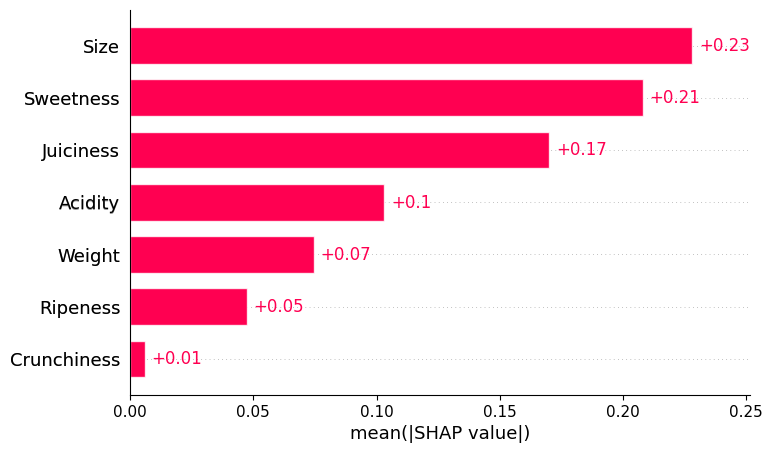

In [38]:
shap.plots.bar(class_shap_values)

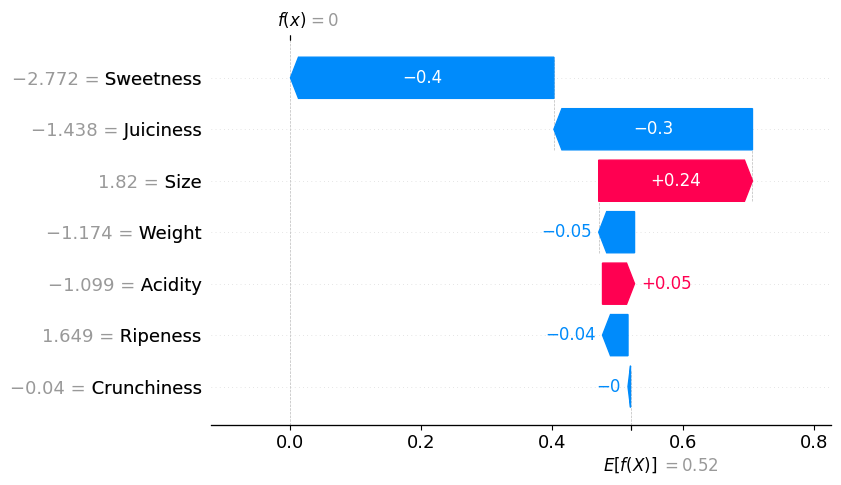

In [39]:
# Plot SHAP values for the first instance
shap.plots.waterfall(class_shap_values[0], max_display=14)

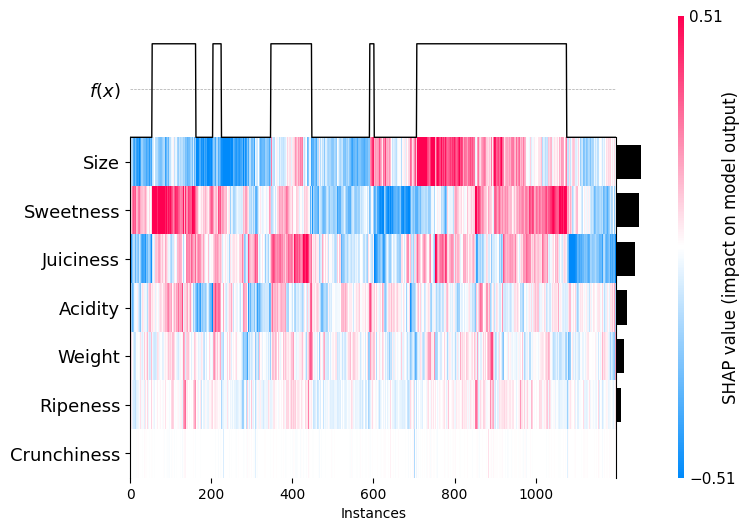

<Axes: xlabel='Instances'>

In [40]:
shap.plots.heatmap(class_shap_values, max_display=14)

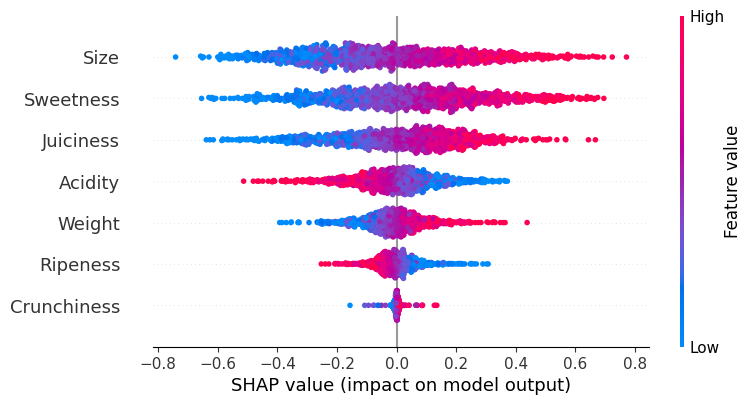

In [41]:
shap.plots.beeswarm(class_shap_values, max_display=14)